In [262]:
import pandas as pd
import datetime
import numpy as np
import math

import plotly.offline as py 
import plotly.graph_objs as go 

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit

import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [206]:
file_url="seattleWeather_1948-2017.csv"

df=pd.read_csv(file_url)

In [207]:
df.sample(10)

,DATE,PRCP,TMAX,TMIN,RAIN
23874,2013-05-13,0.13,66,49,True
8240,1970-07-24,0.00,70,54,False
22191,2008-10-03,0.57,62,57,True
9857,1974-12-27,0.42,38,31,True
17413,1995-09-04,0.26,73,57,True
12774,1982-12-22,0.10,44,35,True
14296,1987-02-21,0.02,47,38,True
20599,2004-05-25,0.13,73,50,True
22857,2010-07-31,0.00,69,53,False
9901,1975-02-09,0.37,51,32,True


In [208]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [209]:
df['PRCP'].isnull().values.any()

True

In [210]:
df=df.dropna()
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [211]:
df['YEAR']=pd.DatetimeIndex(df['DATE']).year
df['MONTH']=pd.DatetimeIndex(df['DATE']).month
df['DAY']=pd.DatetimeIndex(df['DATE']).day
df['TDIFF']=df['TMAX']-df['TMIN']

In [212]:
df.describe()

,PRCP,TMAX,TMIN,YEAR,MONTH,DAY,TDIFF
count,25548.000000,25548.000000,25548.000000,25548.000000,25548.00000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387,1982.474597,6.51914,15.726515,15.029670
std,0.239031,12.773265,8.893019,20.193322,3.44721,8.799877,6.834395
min,0.000000,4.000000,0.000000,1948.000000,1.00000,1.000000,-35.000000
25%,0.000000,50.000000,38.000000,1965.000000,4.00000,8.000000,10.000000
50%,0.000000,58.000000,45.000000,1982.000000,7.00000,16.000000,14.000000
75%,0.100000,69.000000,52.000000,2000.000000,10.00000,23.000000,19.000000
max,5.020000,103.000000,71.000000,2017.000000,12.00000,31.000000,42.000000


In [217]:
df[df['TDIFF']<0]

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY,TDIFF
1419,1951-11-20,0.08,4,39,True,1951,11,20,-35


In [218]:
df=df[df['TDIFF']>=0]

C:\Users\vjib\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\vjib\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\vjib\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



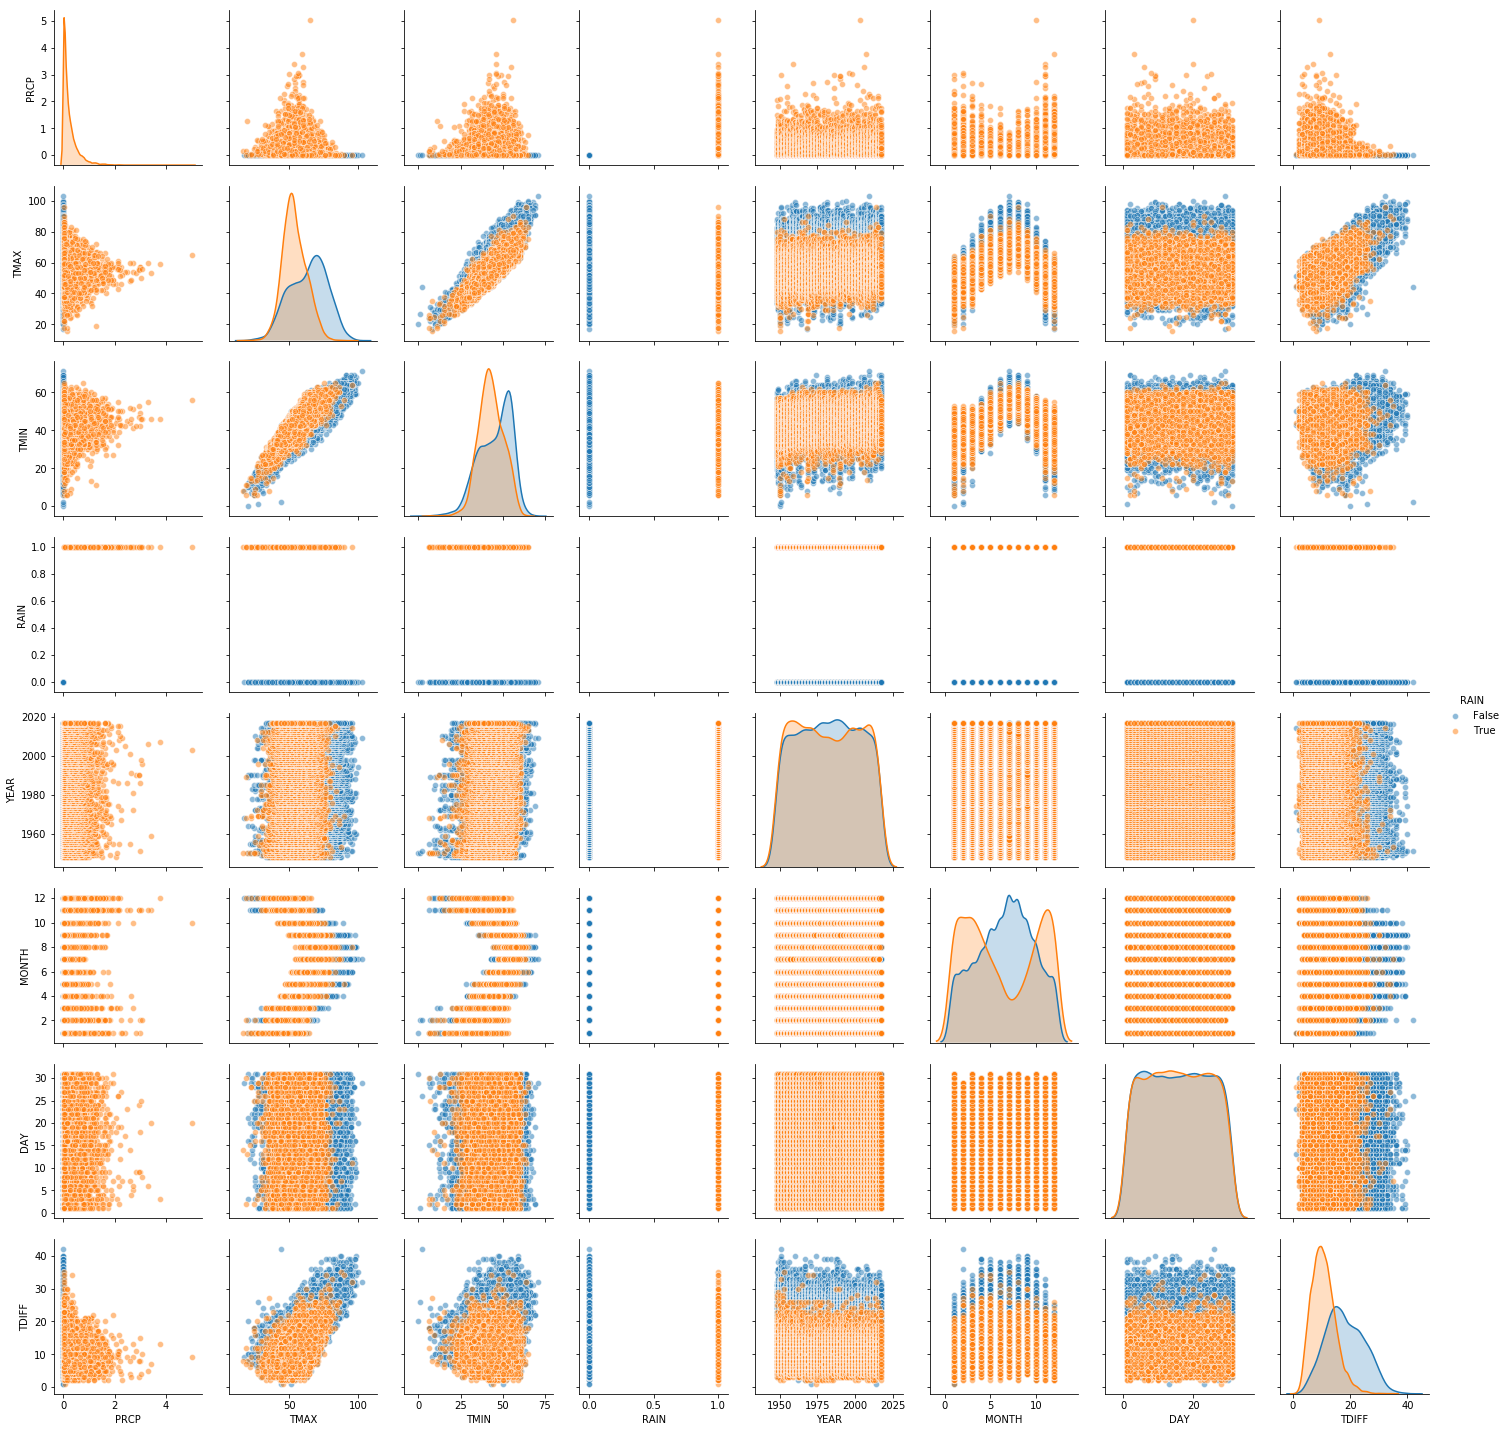

In [219]:
sns.pairplot(df, hue = 'RAIN', plot_kws={'alpha':0.5})

In [275]:
df['TMAX_YESTERDAY']=df['TMAX'].shift(1)
df['TMIN_YESTERDAY']=df['TMIN'].shift(1)
df['TDIFF_YESTERDAY']=df['TDIFF'].shift(1)
df['RAIN_YESTERDAY']=df['RAIN'].shift(1)
df['PRCP_YESTERDAY']=df['PRCP'].shift(1)

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY,TDIFF,TMAX_YESTERDAY,TMIN_YESTERDAY,TDIFF_YESTERDAY,RAIN_YESTERDAY,PRCP_YESTERDAY
0,1948-01-01,0.47,51,42,True,1948,1,1,9,NaN,NaN,NaN,NaN,NaN
1,1948-01-02,0.59,45,36,True,1948,1,2,9,51.0,42.0,9.0,True,0.47
2,1948-01-03,0.42,45,35,True,1948,1,3,10,45.0,36.0,9.0,True,0.59
3,1948-01-04,0.31,45,34,True,1948,1,4,11,45.0,35.0,10.0,True,0.42
4,1948-01-05,0.17,45,32,True,1948,1,5,13,45.0,34.0,11.0,True,0.31
5,1948-01-06,0.44,48,39,True,1948,1,6,9,45.0,32.0,13.0,True,0.17
6,1948-01-07,0.41,50,40,True,1948,1,7,10,48.0,39.0,9.0,True,0.44
7,1948-01-08,0.04,48,35,True,1948,1,8,13,50.0,40.0,10.0,True,0.41
8,1948-01-09,0.12,50,31,True,1948,1,9,19,48.0,35.0,13.0,True,0.04
9,1948-01-10,0.74,43,34,True,1948,1,10,9,50.0,31.0,19.0,True,0.12


In [277]:
df=df.dropna()
df

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY,TDIFF,TMAX_YESTERDAY,TMIN_YESTERDAY,TDIFF_YESTERDAY,RAIN_YESTERDAY,PRCP_YESTERDAY
1,1948-01-02,0.59,45,36,True,1948,1,2,9,51.0,42.0,9.0,True,0.47
2,1948-01-03,0.42,45,35,True,1948,1,3,10,45.0,36.0,9.0,True,0.59
3,1948-01-04,0.31,45,34,True,1948,1,4,11,45.0,35.0,10.0,True,0.42
4,1948-01-05,0.17,45,32,True,1948,1,5,13,45.0,34.0,11.0,True,0.31
5,1948-01-06,0.44,48,39,True,1948,1,6,9,45.0,32.0,13.0,True,0.17
6,1948-01-07,0.41,50,40,True,1948,1,7,10,48.0,39.0,9.0,True,0.44
7,1948-01-08,0.04,48,35,True,1948,1,8,13,50.0,40.0,10.0,True,0.41
8,1948-01-09,0.12,50,31,True,1948,1,9,19,48.0,35.0,13.0,True,0.04
9,1948-01-10,0.74,43,34,True,1948,1,10,9,50.0,31.0,19.0,True,0.12
10,1948-01-11,0.01,42,32,True,1948,1,11,10,43.0,34.0,9.0,True,0.74


In [220]:
df_monthly_mean=df.groupby(['MONTH']).mean()

Text(0.5, 1.0, 'Average Precipitation by Month')

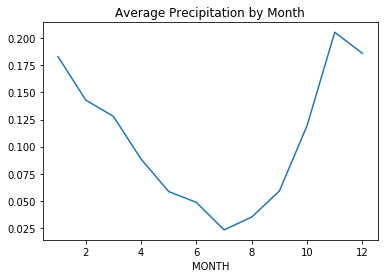

In [221]:
df_monthly_mean['PRCP'].plot()
plt.title('Average Precipitation by Month')

Text(0.5, 1.0, 'Average temperature by Month')

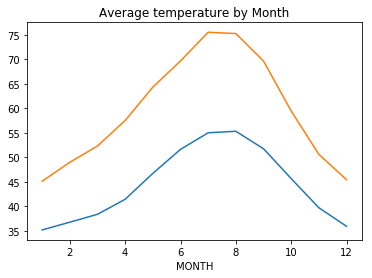

In [222]:
df_monthly_mean['TMIN'].plot()
df_monthly_mean['TMAX'].plot()
plt.title('Average temperature by Month')

In [223]:
df_yearly_mean=df.groupby(['YEAR']).mean()

Text(0.5, 1.0, 'Average Precipitation by Year')

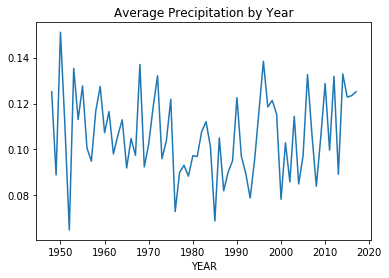

In [224]:
df_yearly_mean['PRCP'].plot()
plt.title('Average Precipitation by Year')

Text(0.5, 1.0, 'Average temperature by Year')

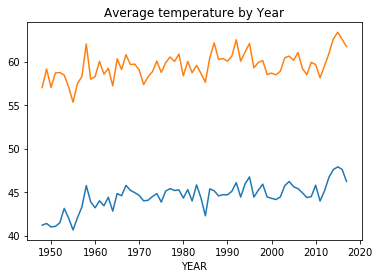

In [225]:
df_yearly_mean['TMIN'].plot()
df_yearly_mean['TMAX'].plot()
plt.title('Average temperature by Year')

In [226]:
df_monthly_raining_day_count=(df[df['PRCP']>0].groupby(['MONTH']).count())/(2017-1948)

In [227]:
df_monthly_raining_day_count

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,DAY,TDIFF
MONTH,,,,,,,,
1,18.811594,18.811594,18.811594,18.811594,18.811594,18.811594,18.811594,18.811594
2,15.985507,15.985507,15.985507,15.985507,15.985507,15.985507,15.985507,15.985507
3,17.565217,17.565217,17.565217,17.565217,17.565217,17.565217,17.565217,17.565217
4,14.463768,14.463768,14.463768,14.463768,14.463768,14.463768,14.463768,14.463768
5,11.173913,11.173913,11.173913,11.173913,11.173913,11.173913,11.173913,11.173913
6,9.159420,9.159420,9.159420,9.159420,9.159420,9.159420,9.159420,9.159420
7,4.971014,4.971014,4.971014,4.971014,4.971014,4.971014,4.971014,4.971014
8,5.985507,5.985507,5.985507,5.985507,5.985507,5.985507,5.985507,5.985507
9,8.826087,8.826087,8.826087,8.826087,8.826087,8.826087,8.826087,8.826087


Text(0.5, 1.0, 'Average number of raining day by Month')

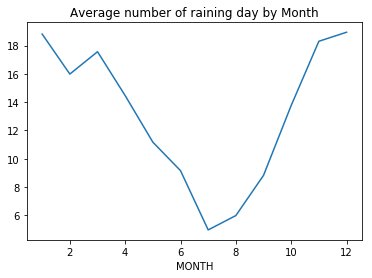

In [228]:
df_monthly_raining_day_count['PRCP'].plot()
plt.title('Average number of raining day by Month')

In [229]:
df_yearly_raining_day_count=(df[df['PRCP']>0].groupby(['YEAR']).count())

In [230]:
df_yearly_raining_day_count

,DATE,PRCP,TMAX,TMIN,RAIN,MONTH,DAY,TDIFF
YEAR,,,,,,,,
1948,177,177,177,177,177,177,177,177
1949,139,139,139,139,139,139,139,139
1950,194,194,194,194,194,194,194,194
1951,149,149,149,149,149,149,149,149
1952,139,139,139,139,139,139,139,139
1953,185,185,185,185,185,185,185,185
1954,167,167,167,167,167,167,167,167
1955,175,175,175,175,175,175,175,175
1956,150,150,150,150,150,150,150,150


Text(0.5, 1.0, 'Average number of raining day by Year')

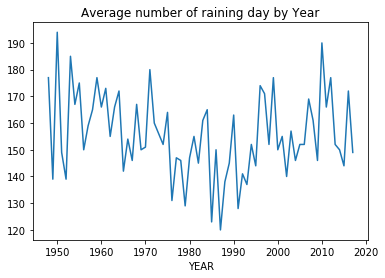

In [231]:
df_yearly_raining_day_count['PRCP'].plot()
plt.title('Average number of raining day by Year')

In [279]:
data_input=[]
data_output=[]

for index,row in df.iterrows():
    temp_input=[]
    
    temp_input.append(row['TMAX'])
    temp_input.append(row['TMIN'])
    
    temp_input.append(row['TDIFF'])
    
    temp_input.append(row['MONTH'])
    
    temp_input.append(row['TMAX_YESTERDAY'])
    temp_input.append(row['TMIN_YESTERDAY'])
    temp_input.append(row['TDIFF_YESTERDAY'])
    temp_input.append(row['PRCP_YESTERDAY'])
    
    data_input.append(temp_input)
    if row['RAIN']:
        data_output.append(1)
    else:
        data_output.append(0)

In [280]:
data_input_normalized = preprocessing.scale(data_input)

In [281]:
data_input_train,data_input_test, data_output_train,data_output_test = train_test_split(data_input_normalized, data_output, test_size=0.1)

In [282]:
clf = LogisticRegression(random_state=0).fit(data_input_train,data_output_train)
clf.score(data_input_train,data_output_train)

0.769301030838154

In [283]:
clf.score(data_input_test,data_output_test)

0.761252446183953

Confusion matrix
[[1142  330]
 [ 280  803]]


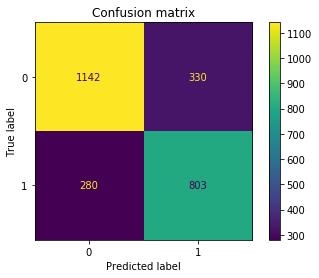

In [284]:
disp = plot_confusion_matrix(clf, data_input_test,data_output_test,values_format="2")

title="Confusion matrix"

disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

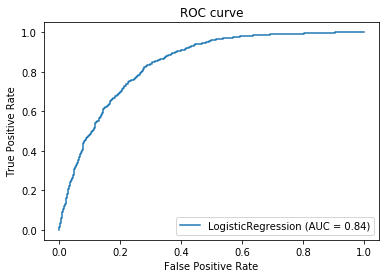

In [285]:
svc_disp = plot_roc_curve(clf, data_input_test,data_output_test)
plt.title("ROC curve")
plt.show()

In [286]:
#If in month 1, 2, 3 or 10, 11,12 , we assume raining no matter what.

def benchmarkModel(inputs):
    outputs=[]
    for data in inputs:
        if data[3]==1 or data[3]==2 or data[3]==3 or data[3]==10 or data[3]==11  or data[3]==12:
            outputs.append(1)
        else:
            outputs.append(0)
    return outputs

In [287]:
benchmark_output=benchmarkModel(data_input)

In [288]:
from sklearn.metrics import accuracy_score

accuracy_score(data_output, benchmark_output)

0.6330932435606357

In [289]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(data_input_train,data_output_train)
model.score(data_input_train,data_output_train)

0.9981731982079944

In [290]:
model.score(data_input_test,data_output_test)

0.7643835616438356

In [291]:
model = GradientBoostingClassifier(n_estimators=1000)
model.fit(data_input_train,data_output_train)
model.score(data_input_train,data_output_train)

0.8177112783263016

In [292]:
model.score(data_input_test,data_output_test)

0.7749510763209393

In [293]:
model = XGBClassifier(n_estimators=1000)
model.fit(data_input_train,data_output_train)
model.score(data_input_train,data_output_train)

0.8113609673350441

In [294]:
model.score(data_input_test,data_output_test)

0.7804305283757339

In [295]:
classifiers = [LogisticRegression(random_state=0), 
               RandomForestClassifier(n_estimators=1000),
               GradientBoostingClassifier(n_estimators=1000),
               XGBClassifier(n_estimators=1000)
              ]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(data_input_train,data_output_train)
    yproba = model.predict_proba(data_input_test)[::,1]
    
    fpr, tpr, _ = roc_curve(data_output_test,  yproba)
    auc = roc_auc_score(data_output_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

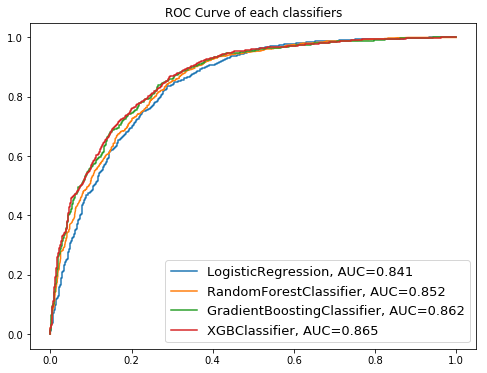

In [296]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'], label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.legend(prop={'size':13}, loc='lower right')
plt.title("ROC Curve of each classifiers")
plt.show()

In [263]:
import scipy.stats as st

params = {  
            "n_estimators": st.randint(3, 40),
            "max_depth": st.randint(3, 40),
            "learning_rate": st.uniform(0.05, 0.4),
            "colsample_bytree": st.beta(10, 1),
            "subsample": st.beta(10, 1),
            "gamma": st.uniform(0, 10),
            'objective': ['binary:logistic'],
            'scale_pos_weight': st.randint(0, 2),
            "min_child_weight": st.expon(0, 50),
        }
premodel=XGBClassifier(nthreads=-1)
model=RandomizedSearchCV(premodel, params, cv=5,n_jobs=1, n_iter=100) 
model.fit(data_input_train,data_output_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None, nthreads=-1,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001933DDB6710>,
                                        'obje

In [266]:
model.best_params_

{'colsample_bytree': 0.9895116258368853,
 'gamma': 6.59773749913051,
 'learning_rate': 0.17818360479317807,
 'max_depth': 22,
 'min_child_weight': 0.10862679742253484,
 'n_estimators': 39,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'subsample': 0.9007352838942227}

In [267]:
model.best_score_

0.7725299985311784

In [268]:
model.score(data_input_test,data_output_test)

0.7741682974559687